In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from astropy.io import ascii

from matplotlib.patches import Rectangle

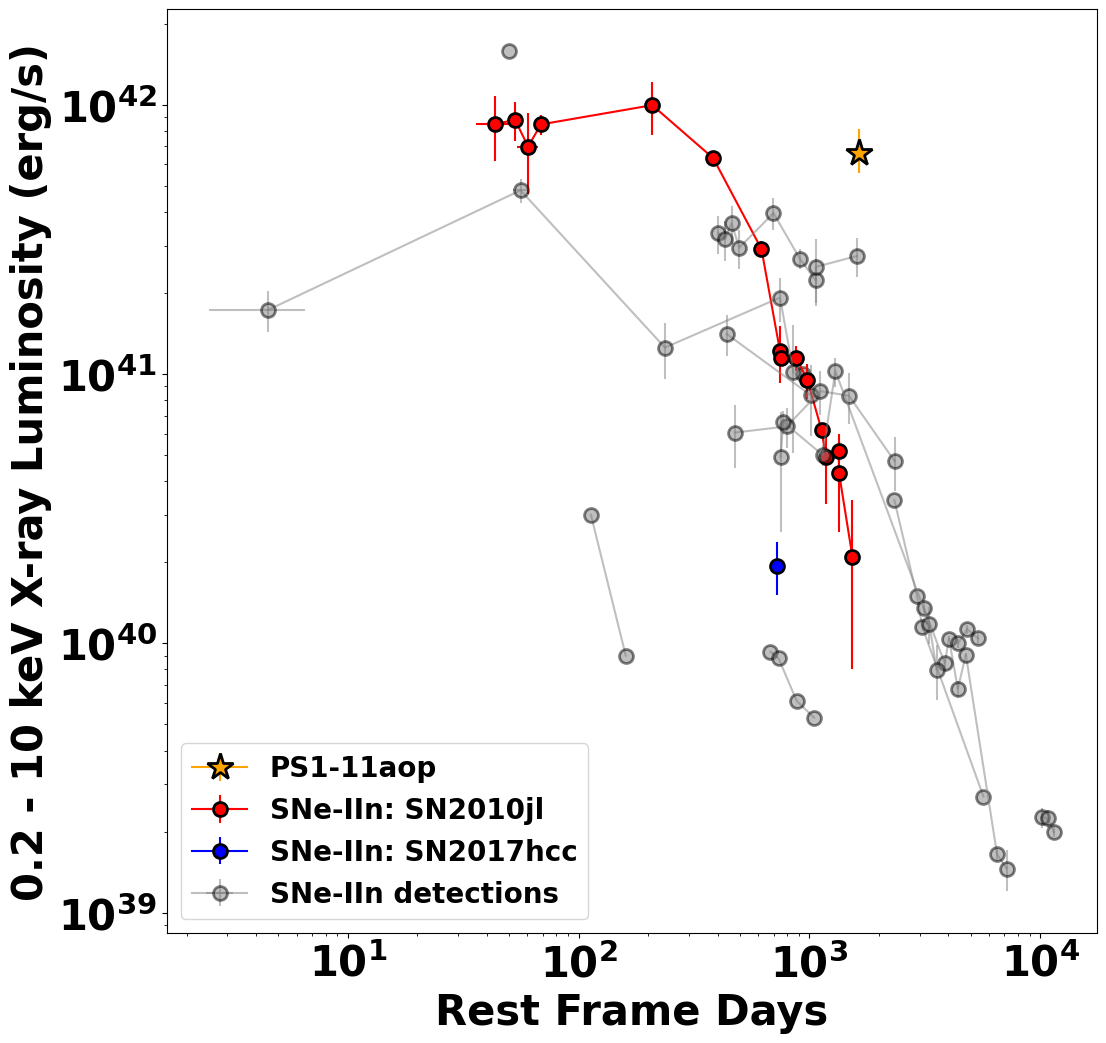

In [2]:
figure= plt.figure(figsize=(12,12))
from matplotlib import rc,rcParams
rc('font', weight='bold')
#fig = plt.figure(figsize=(12,12))

#plot the value for PS1-11aop"
t_sn = 55770.562# - 5
t_obs =  57769.35 # #X-ray observation date  57769.35
z = 0.218

t_phase = (t_obs - t_sn)/(1+z)

lower_error =  1e41
upper_error =  1.5*1e41
asymmetric_error = np.array([[lower_error, upper_error]]).T
plt.vlines([t_phase],[6.6e41-1e41],[6.6e41+(1.5*1e41)],color='orange')
plt.errorbar([t_phase],[6.6e41],yerr= asymmetric_error, marker='*',color='orange',markersize=20,markeredgecolor='k',markeredgewidth=2,label='PS1-11aop')

# Plot IIn comparison data
#SN1998S_lc_02_1000.txt
time_a=np.array([678,735.,882,1048.])
lum_a=np.array([9.3,8.8,6.1,5.3])*1e39
plt.plot(time_a,lum_a,'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN1988Z_lc_20_200.txt
time_b=np.array([2335,2924.,3085,5678])
lum_b=np.array([3.4,1.5,1.15,0.27])*1e40
plt.plot(time_b,lum_b,'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN1986J_lc_20_1000.txt
time_c=np.array([48486.1,49206.5,49374.5,49744.0,50113.5,51852.0,52508.0])-45349
flux_c=np.array([790,491,607,395,528,96,85])*1e-15 #erg/s/cm2
fluxerr_c=np.array([41.,24.,13,26,10.,5.,15.])*1e-15 #erg/s/cm2
ld_c= 12 #Mpc
lum_c = 4*np.pi*flux_c*(ld_c*3.08*1e24)**2#/(1+zred)
lumerr_c = lum_c*(fluxerr_c/flux_c)
plt.errorbar(time_c,lum_c,yerr=lumerr_c,fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN2001em (Ibc --> IIn ish)
time_d=[935.]
lum_d=[1e41]
plt.plot(time_d,lum_d,'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN2010jl_lc_20_1000.txt https://arxiv.org/pdf/1507.06059.pdf
#time_e=np.array([5505.085,5511.216,5521.480,5523.825,5533.896,5537.528,5540.802,5675.205,5850.136,6217.453,6325.680,6379.881,6429.259])-5479
#lum_e = np.array([0.486,0.438,0.528,0.286,0.588,0.449,0.540,1.364,1.465,1.404,1.402,1.380,1.319])*1e41 #erg/s/cm2
time_e=np.array([43.55, 53.03,60.34,68.61,208.30,382.85,619.67,745.17,750.31,877.69,980.01,1128.67,1178.11,1340.25,1343.01,1535.60])
time_err = np.array([7.53,0,6.33,0.43,1.74,0,0,7.15,13.33,33.59,22.33,0,9.57,0,23.89,12.90 ])
lum_e = np.array([8.49,8.78,6.99,8.45,9.96,6.33,2.91,1.22,1.15,1.15,0.95,0.62,0.49,0.52,0.43,0.21])*1e41
lum_err = np.array([2.29,1.42,2.33,0.71,2.23,0.38,0.20,0.29,0.06,0.12,0.14,0.02,0.16,0.04,0.17,0.13])*1e41
plt.errorbar(time_e,lum_e,yerr=lum_err,xerr=time_err,fmt='ro-', markersize=10,markeredgecolor='k',markeredgewidth=2, label='SNe-IIn: SN2010jl')

#SN 2021adxl https://arxiv.org/pdf/2312.13280.pdf
lum_adxl = [3e40,0.9e40]
time_adxl = [113,160]
plt.plot(time_adxl,lum_adxl,'o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN 2017hcc https://ui.adsabs.harvard.edu/abs/2022MNRAS.517.4151C/abstract
time_hcc = [727] 
lum_hcc = [1.94e40]
lum_errhcc = [0.43e40]
plt.errorbar(time_hcc,lum_hcc, yerr=lum_errhcc,fmt='bo-', markersize=10,markeredgecolor='k',markeredgewidth=2,label='SNe-IIn: SN2017hcc')

#SN2007pk_lc_20_1000.txt (0.2-10)
time_1=[4.5,55.9843750,236.3710938 ,745.6679688 ,852.6621094]
errtime_1=[2,3.9570312,0.3671875,0.2695312,0.2363281]
flux_1 = np.array([290,8.0700004473328590e+02,2.1035000681877136e+02,3.2254999969154596e+02,1.7010000301524994e+02])*1e-15 #erg/s/cm2
fluxerr_1=np.array([50,8.0000000e+01,5.0000004e+01,6.0000008e+01,8.5000000e+01])*1e-15 #erg/s/cm2
ld_1= 71.3 #Mpc
zred_1=0.016655
lum_1 = 4*np.pi*flux_1*(ld_1*3.08*1e24)**2/(1+zred_1)
lumerr_1=lum_1*(fluxerr_1/flux_1)
plt.errorbar(time_1,lum_1,yerr=lumerr_1,xerr=errtime_1,fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN2006jd_lc_20_1000.txt: (0.2-10)
#unabsorbed fluxes
time_2=[403.2,431.5,459.8,496.2,698.5,907.7,1063.6,1067.5,1609.8]
errtime_2=[3.1,0,0,0.6,1.0,0,0,0,2]
flux_2 = np.array([451.,428,491,398,535,363,301,338,371])*1e-15 #erg/s/cm2
fluxerr_2=np.array([73,73,79,66,73,30,60,90,60])*1e-15 #erg/s/cm2
ld_2= 79.5 #Mpc
zred_2=0.018556
lum_2 = 4*np.pi*flux_2*(ld_2*3.08*1e24)**2/(1+zred_2)
lumerr_2=lum_2*(fluxerr_2/flux_2)
plt.errorbar(time_2,lum_2,yerr=lumerr_2,xerr=errtime_2,fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN2005kd_lc_20_1000.txt (0.2-10;0.5-8)
time_3=[438.,1013.6763916]
errtime_3=[0,0.271493]
flux_3 = np.array([290,171.768])*1e-15 #erg/s/cm2
fluxerr_3=np.array([50,50])*1e-15 #erg/s/cm2
ld_3= 64.3 #Mpc
zred_3=0.015040
lum_3 = 4*np.pi*flux_3*(ld_3*3.08*1e24)**2/(1+zred_3)
lumerr_3=lum_3*(fluxerr_3/flux_3)
plt.errorbar(time_3,lum_3,yerr=lumerr_3,xerr=errtime_3,fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN2005ip_lc_20_1000.txt: (0.2-10)
#unabsorbed fluxes
time_4=[474.9,798.09,1115.87,1483.53,2339.12]
errtime_4=[0,0,0,0,5]
flux_4 = np.array([569,600,811,780,446])*1e-15 #erg/s/cm2
fluxerr_4=np.array([150,100.,150,170,100])*1e-15 #erg/s/cm2
ld_4= 30 #Mpc
zred_4=0.007138
lum_4 = 4*np.pi*flux_4*(ld_4*3.08*1e24)**2/(1+zred_4)
lumerr_4=lum_4*(fluxerr_4/flux_4)
plt.errorbar(time_4,lum_4,yerr=lumerr_4,xerr=errtime_4,fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN2002hi_lc_50_1000.txt (0.5-10)
time_5=[50]
errtime_5=[0]
flux_5 = np.array([193])*1e-15 #erg/s/cm2
fluxerr_5=np.array([0])*1e-15 #erg/s/cm2
ld_5= 269.9 #Mpc
zred_5=0.061
lum_5 = 4*np.pi*flux_5*(ld_5*3.08*1e24)**2/(1+zred_5)
lumerr_5=lum_5*(fluxerr_5/flux_5)
plt.errorbar(time_5,lum_5,yerr=lumerr_5,xerr=errtime_5,fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN1996cr_lc_30_1000.txt (0.3-10; 0.5-2; 0.5-8; 2-8)
time_6=[4405.6250000,4828.1425781,5374.3500977]
errtime_6=[0.3671875,0.5683594,0.6045370]
flux_6 = np.array([6.1349999159574509e+03,6.9300003349781027e+03,6.4000003039836884e+03])*1e-15 #erg/s/cm2
fluxerr_6=np.array([2.3000000e+02,2.7500000e+02,2.7999997e+02])*1e-15 #erg/s/cm2
ld_6= 3.7 #Mpc
zred_6=0.001448
lum_6 = 4*np.pi*flux_6*(ld_6*3.08*1e24)**2/(1+zred_6)
lumerr_6=lum_6*(fluxerr_6/flux_6)
plt.errorbar(time_6,lum_6,yerr=lumerr_6,xerr=errtime_6,fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN1995N_lc_20_1000.txt (0.1-2.4; 0.2-10; 0.5-7)
time_7=[750,770,1140,1296,3310,3554]
errtime_7=[0,0,0,0,0,0]
flux_7 = np.array([719,973,734,1502,173,117])*1e-15 #erg/s/cm2
fluxerr_7=np.array([340,95,64,185,27,27])*1e-15 #erg/s/cm2
ld_7= 24 #Mpc
zred_7=0.006191
lum_7 = 4*np.pi*flux_7*(ld_7*3.08*1e24)**2/(1+zred_7)
lumerr_7=lum_7*(fluxerr_7/flux_7)
plt.errorbar(time_7,lum_7,yerr=lumerr_7,xerr=errtime_7,fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2)

#SN1978K_lc_30_1000.txt (0.3-10; 0.5-2; 2-10)
time_8=[10188.9707031,10783.6455078,11474.6113281]
errtime_8=[69.0148010,6.0209608,60.5016708]
flux_8 = np.array([1.1125000193715096e+03,1.1034999974071980e+03,9.8000001162290562e+02])*1e-15 #erg/s/cm2
fluxerr_8=np.array([9.5000003415106335e+01,8.5000000202457841e+01,4.2999996873729557e+01])*1e-15 #erg/s/cm2
ld_8= 4.13 #Mpc
zred_8=0.00156
lum_8 = 4*np.pi*flux_8*(ld_8*3.08*1e24)**2/(1+zred_8)
lumerr_8=lum_8*(fluxerr_8/flux_8)
plt.errorbar(time_8,lum_8,yerr=lumerr_8,xerr=errtime_8,fmt='o-',color='gray',alpha=0.5, markersize=10,markeredgecolor='k',markeredgewidth=2,label='SNe-IIn detections')

#Plot axes labels
plt.ylabel('0.2 - 10 keV X-ray Luminosity (erg/s)',fontsize=30,fontweight='bold')
plt.xlabel('Rest Frame Days',fontsize=30,fontweight='bold')
plt.yscale('log')
plt.xscale('log')

plt.legend(fontsize=20)
plt.tick_params(labelsize = 30)
figure.savefig('x-ray-result.png',dpi = 300,transparent=True,bbox_inches='tight')
